<a href="https://colab.research.google.com/github/guillerminaamorin/Blog/blob/master/argenistan_ciclos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

[*********************100%***********************]  7 of 7 completed


Text(0.5, 0.95, 'Ciclos de Argenistan (comparación base 100 inicio ciclo)')

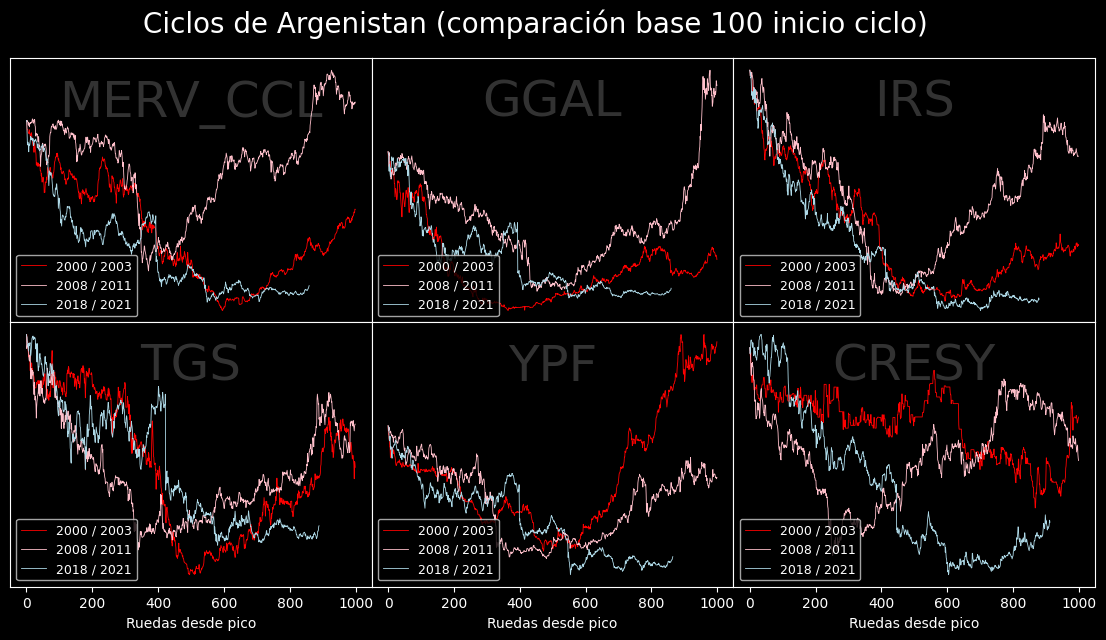

In [ ]:
import yfinance as yf, pandas as pd, matplotlib.pyplot as plt, statistics as st
from datetime import datetime as date

plt.rcParams['figure.dpi'] = 100
plt.style.use('dark_background')
long_ciclo = 1000

tickers = ['^MERV', 'GGAL', 'GGAL.BA','TGS','YPF','CRESY','IRS']
data = yf.download(tickers, auto_adjust=True, start='1999-01-01')['Close']
data = data.fillna(method='bfill')
data['CCL'] = (data['GGAL.BA']/data['GGAL']*10).rolling(10).mean()
data['MERV_CCL'] = data['^MERV'] / data['CCL']

aths_hist = { 'MERV_CCL': [date(2000,3,3), date(2007,6,18), date(2018,1,31) ],
              'GGAL' : [date(2001,1,23), date(2007,2,20), date(2018,1,31)],
              'IRS' : [date(2000,3,16), date(2007,5,23), date(2018,1,4)],
              'TGS' : [date(2000,7,14), date(2007,7,5), date(2017,12,20)],
              'YPF' : [date(2000,8,23), date(2011,1,6), date(2018,1,24)],
              'CRESY' : [date(1999,5,5), date(2007,11,6), date(2017,11,17)] }

rows, cols = 2, 3
fig, ax = plt.subplots(figsize=(14,7), ncols=cols, nrows=rows)
series, dd, ppc_ppv = {}, {}, {}
for j, ticker in enumerate(aths_hist.keys()):
    series[ticker] = pd.DataFrame()
    for i in range(3):
        start = aths_hist[ticker][i]
        df = data[ticker].loc[data.index >= start].iloc[:long_ciclo] / data[ticker].loc[start] *100
        series[ticker] = pd.concat([series[ticker], df.reset_index(drop=True)], axis=1)
    
    series[ticker].columns = ['2000 / 2003','2008 / 2011','2018 / 2021']
    dd[ticker] = series[ticker].min()
    ppc = (700-400) / ((1/(series[ticker].iloc[400:700])).sum())
    ppv = series[ticker].iloc[800:1000].mean()
    ppc_ppv[ticker] = pd.concat([ppc,ppv],axis=1)
    row, col = j//cols, j%cols
    series[ticker].plot(lw=.6, color=['red','pink','lightblue'], ax=ax[row][col])
    ax[row][col].legend(loc='lower left', fontsize=9)
    ax[row][col].set_title(ticker, y=0.75, fontsize=36, color=(1,1,1,0.2))
    ax[row][col].tick_params(axis='y', left=False, right=False, labelleft=False) 
    ax[row][col].set_xlabel('Ruedas desde pico')

plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Ciclos de Argenistan (comparación base 100 inicio ciclo)', fontsize=20, y=0.95)

In [ ]:
dd = (pd.concat(dd, axis=1)-100).round(2)
print('drawdowns en cada ciclo (% Caídas desde max anterior)')
dd

drawdowns en cada ciclo (% Caídas desde max anterior)


,MERV_CCL,GGAL,IRS,TGS,YPF,CRESY
2000 / 2003,-89.81,-98.98,-88.28,-92.62,-75.80,-62.67
2008 / 2011,-71.10,-86.96,-86.01,-83.10,-80.37,-81.28
2018 / 2021,-85.90,-91.33,-91.82,-81.27,-90.08,-88.83


In [ ]:
print('Estrategia comprar con DCA entre ruedas 400-700 \
      \nVender precio medio entre las ruedas 800 y 1000 \n')
ppc_base_100 = pd.concat(ppc_ppv, axis=1).swaplevel(0,1, axis=1)[0]
ppv_base_100 = pd.concat(ppc_ppv, axis=1).swaplevel(0,1, axis=1)[1]
estr_prom = ((ppv_base_100 / ppc_base_100 -1)*100).round()
estr_prom

Estrategia comprar con DCA entre ruedas 400-700       
Vender precio medio entre las ruedas 800 y 1000 



,MERV_CCL,GGAL,IRS,TGS,YPF,CRESY
2000 / 2003,108.0,279.0,81.0,218.0,257.0,-26.0
2008 / 2011,84.0,260.0,183.0,95.0,135.0,45.0
2018 / 2021,-14.0,-23.0,-11.0,-24.0,-33.0,14.0


In [ ]:
print('Ganancia %  Ciclo 2018/2021 \
        \nEstrategia comprar con DCA entre ruedas 400-700, \
        \nVender asumiendo que recupera la mitad del ATH previo \n')

estr_50pct_ATH = ((50 / ppc_base_100.loc['2018 / 2021'] -1)*100).round()
estr_50pct_ATH

Ganancia %  Ciclo 2018/2021         
Estrategia comprar con DCA entre ruedas 400-700,         
Vender asumiendo que recupera la mitad del ATH previo 



MERV_CCL    131.0
GGAL        228.0
IRS         264.0
TGS          64.0
YPF         106.0
CRESY       123.0
Name: 2018 / 2021, dtype: float64

In [ ]:
print('Ganancia % Estrategia comprar con DCA entre ruedas 400-700 \
      \nVender asumiendo que recupera ATH previo (ponele)\n')

estr_max = ((100 / ppc_base_100.loc['2018 / 2021'] -1)*100).round()
estr_max

Ganancia % Estrategia comprar con DCA entre ruedas 400-700       
Vender asumiendo que recupera ATH previo (ponele)



MERV_CCL    362.0
GGAL        555.0
IRS         627.0
TGS         228.0
YPF         313.0
CRESY       346.0
Name: 2018 / 2021, dtype: float64

In [ ]:
print('Pisos de ciclo, Precios mínimos Base ATH=100')
dd+100

Pisos de ciclo, Precios mínimos Base ATH=100


,MERV_CCL,GGAL,IRS,TGS,YPF,CRESY
2000 / 2003,10.19,1.02,11.72,7.38,24.20,37.33
2008 / 2011,28.90,13.04,13.99,16.90,19.63,18.72
2018 / 2021,14.10,8.67,8.18,18.73,9.92,11.17


In [ ]:
print('Precio promedio de compra: PPC, comprando entre rueda 400 y 700 con DCA, Base ATH=100')
ppc_base_100.round(2)

Precio promedio de compra: PPC, comprando entre rueda 400 y 700 con DCA, Base ATH=100


,MERV_CCL,GGAL,IRS,TGS,YPF,CRESY
2000 / 2003,20.45,8.06,16.75,15.75,36.71,72.12
2008 / 2011,56.92,23.11,24.19,30.09,28.27,51.71
2018 / 2021,21.65,15.26,13.75,30.45,24.24,22.42


In [ ]:
print('Precio de venta, Salida entre rueda 800/1000, Base ATH=100')
ppv_base_100.round(2)

Precio de venta, Salida entre rueda 800/1000, Base ATH=100


,MERV_CCL,GGAL,IRS,TGS,YPF,CRESY
2000 / 2003,42.47,30.53,30.25,50.08,130.97,53.07
2008 / 2011,104.73,83.09,68.39,58.71,66.37,74.80
2018 / 2021,18.70,11.70,12.29,23.00,16.34,25.57
